Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Đọc dữ liệu từ file "SAT_GPA.csv" và hiển thị ra mô tả của dữ liệu

In [3]:
data = pd.read_csv("D:/Code/python/mat3533/practice02/data/SAT_GPA.csv")
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Tạo dữ liệu training và dữ liệu test (validation)

In [10]:
x = data['SAT']
y = data['GPA']
x = np.array([x]).T
y = np.array([y]).T
x_training = x[:60]
y_training = y[:60]
x_validation = x[60:]
y_validation = y[60:]

Hiển thị dữ liệu trên mặt phẳng tọa độ 

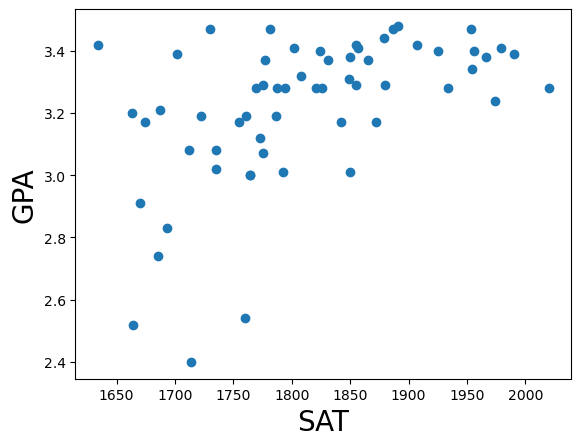

In [14]:
plt.scatter(x_training, y_training)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Tính các hệ số của mô hình tuyến tính ứng với dữ liệu training

In [12]:
one = np.ones((x_training.shape[0], 1))
xbar = np.concatenate((one, x_training), axis = 1)
A = np.dot(xbar.T, xbar)
b = np.dot(xbar.T, y_training)
w = np.dot(np.linalg.pinv(A), b)
print("w = ", w)

w =  [[0.88948508]
 [0.0012857 ]]


Vẽ đồ thị của đường hồi quy với các điểm dữ liệu đã vẽ ở trên

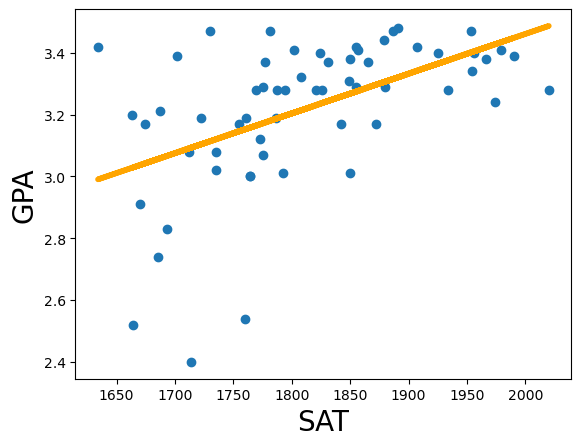

In [15]:
w_0 = w[0][0]
w_1 = w[1][0]
plt.scatter(x_training, y_training)
yhat = w_1*x_training + w_0
fig = plt.plot(x_training, yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Chạy thử mô hình với với dữ liệu validation

In [48]:
y_predict = w_1*x_validation + w_0
print(y_predict)

[[3.4146054 ]
 [3.21403576]
 [3.3233205 ]
 [3.51360452]
 [3.3233205 ]
 [3.24489263]
 [3.26803528]
 [3.37603432]
 [3.28217801]
 [3.37217721]
 [3.37474861]
 [3.17546468]
 [3.42874813]
 [3.37603432]
 [3.48789046]
 [3.48017624]
 [3.45703359]
 [3.48660476]
 [3.25903536]
 [3.37860572]
 [3.21660717]
 [3.44417657]
 [3.412034  ]
 [3.52517584]]


Tính tổng bình phương sai số

In [49]:
sum_square_residual = sum((y_validation - y_predict)**2)
print(sum_square_residual)

[1.67868634]
